<h1><center><font size="6">Final Project Group 32</font></center></h1>

<h2><center><font size="5">Milestone 2 - EDA</font></center></h2>

<br>

# <a id='0'>Content</a>

- <a href='#1'>1. Introduction</a> 
- <a href='#2'>2. Data parsing and cleaning</a>
- <a href='#3'>3. Data exploration and data understanding</a>
- <a href='#3'>4. Conclusion</a>  

# <a id='1'>1. Introduction</a>

# <a id='2'>2. Data parsing and cleaning</a>

In [29]:
# libraries
import json
import lzma
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import re
from tqdm import tqdm
from IPython.core.display import display, HTML
import re
from nltk.tokenize import RegexpTokenizer

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [32]:
def get_counts(state):
    cases = []
    with lzma.open("../" + state + '-text/data/data.jsonl.xz', 'r') as jsonl_file:
        for case in jsonl_file:
            c = json.loads(str(case, 'utf-8'))

            date = c['decision_date']

            headnotes = tokenizer.tokenize(c['casebody']['data']['head_matter'])
            num_headnotes = len(headnotes)

            opinions = c['casebody']['data']['opinions']
            if opinions == []:
                num_opinions = 0
            else:
                opinions = tokenizer.tokenize(opinions[0]['text'])
                num_opinions = len(opinions)
            cases.append({'date':date, 'num_headnotes':num_headnotes, 'num_opinions':num_opinions})
        return pd.DataFrame(cases)
    
# setting up tokenizer (missing in this notebook)
tokenizer = RegexpTokenizer('\s+', gaps=True)

In [33]:
%%time

states = ['Arkansas', 'Illinois', 'New Mexico', 'North Carolina']
counts_ar = get_counts(states[0])
counts_il = get_counts(states[1])
counts_nm = get_counts(states[2])
counts_nc = get_counts(states[3])

In [40]:
counts_ar.to_csv('csv/counts_ar.csv', index=False)
counts_il.to_csv('csv/counts_il.csv', index=False)
counts_nm.to_csv('csv/counts_nm.csv', index=False)
counts_nc.to_csv('csv/counts_nc.csv', index=False)

In [41]:
def get_mean(df):
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df['year'] = df['date'].dt.year
    df_year = df.groupby('year').agg('mean')
    return df_year

In [42]:
counts_nc['date'] = pd.to_datetime(counts_nc['date'], errors='coerce')

In [43]:
year_ar = get_mean(counts_ar)
year_il = get_mean(counts_il)
year_nm = get_mean(counts_nm)
year_nc = get_mean(counts_nc)

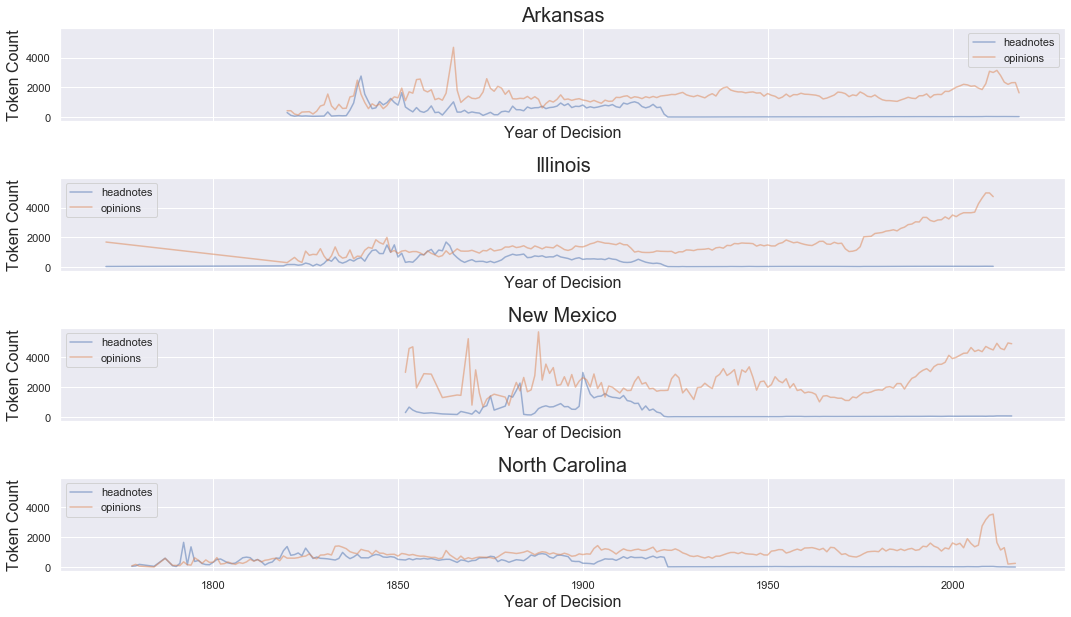

In [44]:
dfs = [counts_ar, counts_il, counts_nm, counts_nc]

f, ax = plt.subplots(4,1, figsize=[18,10], sharey=True, sharex=True)
plt.subplots_adjust(hspace=0.6)

for c in range(len(states)):
    df = get_mean(dfs[c])
#     display(df.head(1))
    ax[c].plot(df.num_headnotes, alpha=0.5, label='headnotes')
    ax[c].plot(df.num_opinions, alpha=0.5, label='opinions')
    ax[c].set_title(states[c], fontsize=20)
    ax[c].set_xlabel('Year of Decision', fontsize=16)
    ax[c].set_ylabel('Token Count', fontsize=16)
    ax[c].legend()

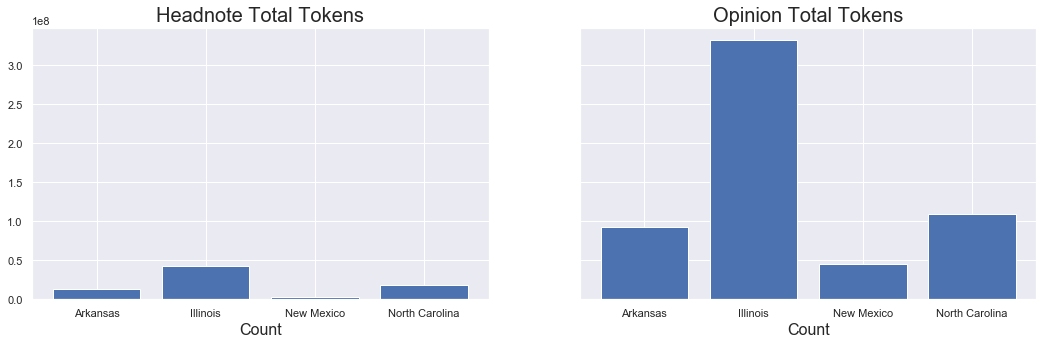

In [45]:
def headnote_total(df):
    return df['num_headnotes'].sum(axis=0)
headnote_totals = [headnote_total(df) for df in dfs]

def opinion_total(df):
    return df['num_opinions'].sum(axis=0)
opinion_totals = [opinion_total(df) for df in dfs]

f, ax = plt.subplots(1,2, figsize=[18,5], sharey=True)
ax[0].bar(states, headnote_totals)
ax[0].set_title('Headnote Total Tokens', fontsize=20)
ax[0].set_xlabel('Count', fontsize=16)

ax[1].bar(states, opinion_totals)
ax[1].set_title('Opinion Total Tokens', fontsize=20)
ax[1].set_xlabel('Count', fontsize=16)
plt.show()

/Users/akirasato/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


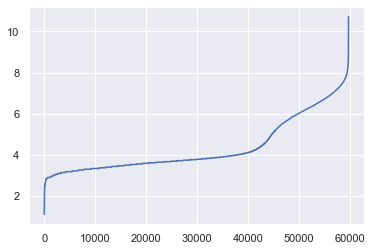

In [59]:
num_headnotes_ar = np.array(counts_ar.iloc[:,1])
num_headnotes_ar_sort = np.sort(num_headnotes_ar)
plt.plot(range(len(num_headnotes_ar_sort)),np.log(num_headnotes_ar_sort));

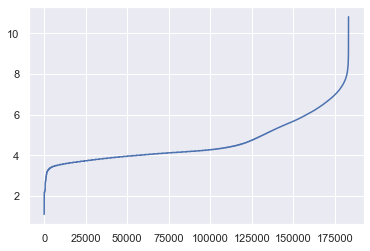

In [60]:
num_headnotes_il = np.array(counts_il.iloc[:,1])
num_headnotes_il_sort = np.sort(num_headnotes_il)
plt.plot(range(len(num_headnotes_il_sort)),np.log(num_headnotes_il_sort));

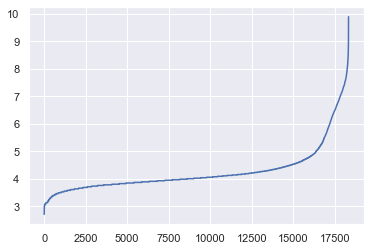

In [61]:
num_headnotes_nm = np.array(counts_nm.iloc[:,1])
num_headnotes_nm_sort = np.sort(num_headnotes_nm)
plt.plot(range(len(num_headnotes_nm_sort)),np.log(num_headnotes_nm_sort));

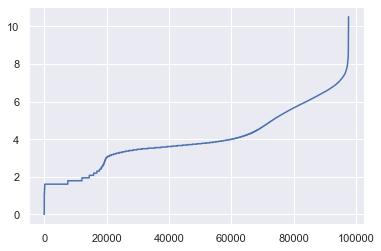

In [62]:
num_headnotes_nc = np.array(counts_nc.iloc[:,1])
num_headnotes_nc_sort = np.sort(num_headnotes_nc)
plt.plot(range(len(num_headnotes_nc_sort)),np.log(num_headnotes_nc_sort));